In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Datasets/CleanData.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

In [5]:
categorical_feature = df.columns[df.dtypes == 'object']
numerical_feature = df.columns[df.dtypes != 'object']

In [6]:
categorical_feature

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [7]:
numerical_feature

Index(['Age', 'Na_to_K'], dtype='object')

In [8]:
for fea in categorical_feature:
    unique = df[fea].unique()
    print(f"{fea} :  {unique}")

Sex :  ['F' 'M']
BP :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
Drug :  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [9]:
sex = ["F","M"]
BP = ['LOW','NORMAL','HIGH']
cholestrol = ['NORMAL','HIGH']
Drug = ["drugX","DrugY","drugA","drugB","drugC"]

In [10]:
df['Sex'] = df['Sex'].map({'F' :0,'M':1})
df['BP'] = df['BP'].map({'LOW':0,'NORMAL':1,"HIGH":2})
df["Cholesterol"] = df['Cholesterol'].map({"NORMAL":0,"HIGH":1})
df["Drug"] = df['Drug'].map({'drugX':0,"DrugY":1,"drugA":2,"drugB":3,"drugC":4})

# Data Binning 
The age will be divided into 7 age categories:

Below 20 y.o 

20 - 29 y.o

30 - 39 y.o

40 - 49 y.o.

50 - 59 y.o.

60 - 69 y.o.

Above 70.

In [12]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = [19, 20, 30, 40, 50, 60, 61]
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

# Na_to_K 
The chemical ratio will be divided into 4 categories:

Bew 10.

10 - 20.

20 - 30.

Above 30.e 30.

In [14]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = [9, 10, 20, 30]
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

In [15]:
df.head()

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,0,2,1,1,20,20
1,1,0,1,4,40,10
2,1,0,1,4,40,10
3,0,1,1,0,20,9
4,0,0,1,1,60,10


In [16]:
# Feature Engineering

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
x = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) 

In [19]:
# x_train = pd.get_dummies(x_train)
# x_test = pd.get_dummies(x_test)

In [20]:
x_train.head()

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
131,1,0,0,50,30
96,0,0,1,50,30
181,0,1,1,50,10
19,0,2,0,30,20
153,0,0,0,61,10


In [21]:
x_test.head()

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
18,1,0,1,20,9
170,0,1,1,20,10
107,1,0,1,40,20
98,1,2,0,20,30
177,1,1,1,20,20


# SMOTE Technique 
Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting

In [23]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

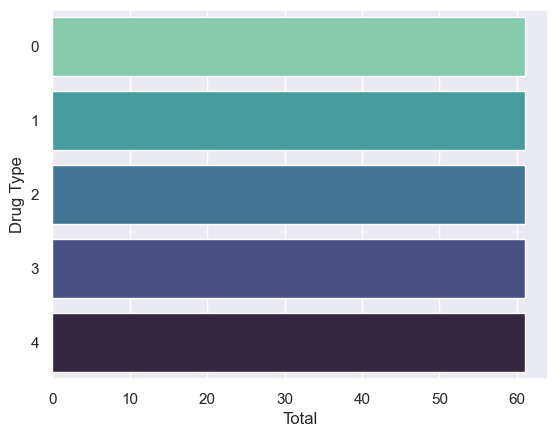

In [24]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

# Model Training

In [26]:
# Linear Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.41      0.72      0.52        18
           1       0.64      0.60      0.62        30
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.52        60
   macro avg       0.21      0.26      0.23        60
weighted avg       0.44      0.52      0.47        60

[[13  5  0  0  0]
 [12 18  0  0  0]
 [ 3  2  0  0  0]
 [ 3  0  0  0  0]
 [ 1  3  0  0  0]]
Logistic Regression accuracy is: 51.67%


In [28]:
# K Neighbours Classifiers

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(x_train, y_train)

y_pred = KNclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       1.00      0.53      0.70        30
           2       0.33      1.00      0.50         5
           3       0.33      1.00      0.50         3
           4       0.33      0.25      0.29         4

    accuracy                           0.62        60
   macro avg       0.54      0.69      0.53        60
weighted avg       0.78      0.62      0.64        60

[[12  0  6  0  0]
 [ 2 16  4  6  2]
 [ 0  0  5  0  0]
 [ 0  0  0  3  0]
 [ 3  0  0  0  1]]
K Neighbours accuracy is: 61.67%


In [30]:
# Multi Model Training

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

In [32]:
support_vector = SVC(kernel='linear', max_iter=251)
Kneighbars = KNeighborsClassifier(n_neighbors=20)
NBclassifier1 = CategoricalNB()
NBclassifier2 = GaussianNB()
decision_tree = DecisionTreeClassifier(max_leaf_nodes=20)
logistic = LogisticRegression(solver = 'liblinear', penalty = 'l1',max_iter=5000)
random_forest = RandomForestClassifier(max_leaf_nodes=30) 
ada_boost = AdaBoostClassifier(n_estimators = 20, )
bagging = BaggingClassifier(estimator = DecisionTreeClassifier(),n_estimators = 20,max_samples = 0.8,oob_score = True)
Gradient_boost = GradientBoostingClassifier(n_estimators = 20)

In [33]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
from sklearn.pipeline import make_pipeline
base_learner = [
    ('support_vector', SVC(kernel='linear', max_iter=251,probability=True)),  # Enable probability for SVC
    ('logistic', LogisticRegression(solver = 'liblinear', penalty = 'l1',max_iter=5000)),
    ('random_forest', RandomForestClassifier(max_leaf_nodes=30)),
    ('Kneighbars',KNeighborsClassifier(n_neighbors=20))   
]
stacking = StackingClassifier(estimators=base_learner, final_estimator=DecisionTreeClassifier(max_leaf_nodes=20))

In [35]:
classification = {
    'Support Vector Classifier' : support_vector,
    'K-Neighbors Classifier'  : Kneighbars,
    'Decision Tree Classifier'  : decision_tree,
    'Logistic Regression'  : logistic,
    'Random Forest Classifier'  : random_forest,
    'AdaBoost Classifier': ada_boost,
    'Bagging Classifier' : bagging,
    'Stacking':stacking,
    'Gradient Boosting Classifier' : Gradient_boost,
}

In [36]:

def train_classifier(classification, X_train, y_train, X_test, y_test):
  classification.fit(X_train, y_train) 
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(y_pred,y_test)
  precision = precision_score(y_pred,y_test,average="macro")
  matrix = confusion_matrix(y_pred,y_test)
  return accuracy, precision, matrix

In [37]:
accuracy_scores = []
precision_scores = []

for name, cls in classification.items():
  accuracy, precision, matrix = train_classifier(cls, x_train, y_train, x_test, y_test)
  
  print("Model name : ", name)
  print("Accuracy : ", accuracy)
  print("Precision : ", precision)
  print("Confusin-Matrix : ", matrix)
  print()
        
  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  

Model name :  Support Vector Classifier
Accuracy :  0.8333333333333334
Precision :  0.7488888888888889
Confusin-Matrix :  [[17  2  0  0  0]
 [ 1 24  0  3  0]
 [ 0  2  5  0  0]
 [ 0  0  0  0  0]
 [ 0  2  0  0  4]]

Model name :  K-Neighbors Classifier
Accuracy :  0.6166666666666667
Precision :  0.6900000000000001
Confusin-Matrix :  [[12  2  0  0  3]
 [ 0 16  0  0  0]
 [ 6  4  5  0  0]
 [ 0  6  0  3  0]
 [ 0  2  0  0  1]]

Model name :  Decision Tree Classifier
Accuracy :  0.8333333333333334
Precision :  0.9
Confusin-Matrix :  [[18  4  0  0  0]
 [ 0 21  1  0  0]
 [ 0  2  4  0  0]
 [ 0  1  0  3  0]
 [ 0  2  0  0  4]]

Model name :  Logistic Regression
Accuracy :  0.7833333333333333
Precision :  0.768888888888889
Confusin-Matrix :  [[14  1  0  0  0]
 [ 4 24  0  0  0]
 [ 0  1  3  1  0]
 [ 0  2  2  2  0]
 [ 0  2  0  0  4]]

Model name :  Random Forest Classifier
Accuracy :  0.85
Precision :  0.9400000000000001
Confusin-Matrix :  [[18  4  0  0  0]
 [ 0 21  0  0  0]
 [ 0  2  5  0  0]
 [ 0  1  

In [38]:
# Overall Result

In [39]:
result_dataframe = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 
                                 'Precision' : precision_scores,})

In [40]:
result_dataframe

,Algorithm,Accuracy,Precision
0,Support Vector Classifier,0.833333,0.748889
1,K-Neighbors Classifier,0.616667,0.690000
2,Decision Tree Classifier,0.833333,0.900000
3,Logistic Regression,0.783333,0.768889
4,Random Forest Classifier,0.850000,0.940000
5,AdaBoost Classifier,0.500000,0.540000
6,Bagging Classifier,0.816667,0.908889
7,Stacking,0.766667,0.742222
8,Gradient Boosting Classifier,0.850000,0.940000


In [41]:
max_accuracy_idx  = result_dataframe['Accuracy'].idxmax()
max_accuracy_idx

4

In [42]:
based_moel_name = result_dataframe.loc[max_accuracy_idx,'Algorithm']
based_moel_name

'Random Forest Classifier'

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [44]:
bagging.fit(x_train, y_train) 
y_pred = bagging.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred,average="macro")
F1_score = f1_score(y_test, y_pred,average="macro")

In [45]:
print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", F1_score)

Accuracy   : 0.8166666666666667
Precision  : 0.7610877192982455
Recall     : 0.8844444444444445
F1-score   : 0.8098560898560899


In [46]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.88      0.73      0.80        30
           2       0.67      0.80      0.73         5
           3       0.75      1.00      0.86         3
           4       0.67      1.00      0.80         4

    accuracy                           0.82        60
   macro avg       0.76      0.88      0.81        60
weighted avg       0.83      0.82      0.82        60



In [47]:
# confusion matrix

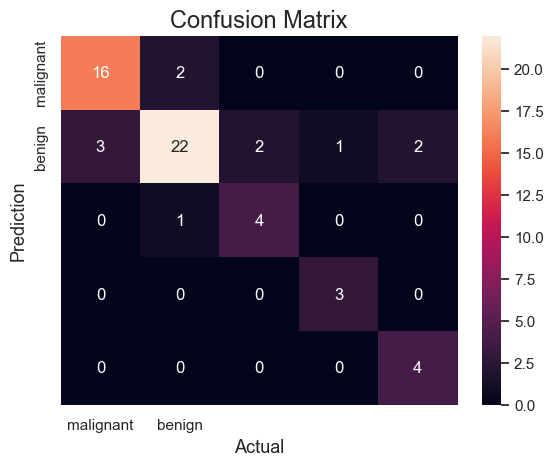

In [48]:
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [49]:
input_data = (61,1,0,1,10.798)
input_data_array = np.asarray(input_data)
input_data_reshaped =  input_data_array.reshape(1,-1)
print(input_data_reshaped)

[[61.     1.     0.     1.    10.798]]


In [50]:
prediction = stacking.predict(input_data_reshaped)
print(prediction)

[0]


In [51]:
if prediction == 0:
    print("DrugX")
elif prediction == 1:
    print("DrugY")
elif prediction == 2:
    print("DrugA")
elif prediction == 3:
    print("DrugB")
else:
    print("DrugC")

DrugX
